## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [602]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [603]:
df = pd.read_csv('/Users/henripeters/Documents/Projetperso/Python100day/Advanced/Datascience/Stackoverflow/QueryResults.csv')


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [604]:
print(df.head())
print(df.tail())

                     m     TagName  Unnamed: 2
0  2008-07-01 00:00:00          c#           3
1  2008-08-01 00:00:00    assembly           8
2  2008-08-01 00:00:00  javascript         162
3  2008-08-01 00:00:00           c          85
4  2008-08-01 00:00:00      python         124
                        m TagName  Unnamed: 2
1986  2020-07-01 00:00:00       r        5694
1987  2020-07-01 00:00:00      go         743
1988  2020-07-01 00:00:00    ruby         775
1989  2020-07-01 00:00:00    perl         182
1990  2020-07-01 00:00:00   swift        3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [605]:
print(df.shape)

(1991, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [606]:
print(df.count())

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [607]:
data = df.groupby('TagName')['Unnamed: 2'].sum()
data.sort_values(ascending=False)


TagName
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: Unnamed: 2, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [608]:
df['m'] = pd.to_datetime(df['m'])
df['TimeDifference'] = datetime.now() - df['m']
df['TimeDifference'] = df['TimeDifference'].dt.days / 30.436875
data = df.groupby('TagName')['TimeDifference'].max()
data.sort_values(ascending=True)


TagName
go            163.453048
swift         173.440933
r             177.449229
assembly      178.467730
c             178.467730
c++           178.467730
delphi        178.467730
java          178.467730
javascript    178.467730
perl          178.467730
php           178.467730
python        178.467730
ruby          178.467730
c#            179.486232
Name: TimeDifference, dtype: float64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [609]:
df['m'] = df['m'].dt.date
print(df['m'])

0       2008-07-01
1       2008-08-01
2       2008-08-01
3       2008-08-01
4       2008-08-01
           ...    
1986    2020-07-01
1987    2020-07-01
1988    2020-07-01
1989    2020-07-01
1990    2020-07-01
Name: m, Length: 1991, dtype: object


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [610]:
print(df.shape)

(1991, 4)


In [611]:
print(df.columns)

Index(['m', 'TagName', 'Unnamed: 2', 'TimeDifference'], dtype='object')


In [612]:
print(df.head())

            m     TagName  Unnamed: 2  TimeDifference
0  2008-07-01          c#           3      179.486232
1  2008-08-01    assembly           8      178.467730
2  2008-08-01  javascript         162      178.467730
3  2008-08-01           c          85      178.467730
4  2008-08-01      python         124      178.467730


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [613]:
print(df.groupby('TagName')['Unnamed: 2'].count())

TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: Unnamed: 2, dtype: int64


In [614]:
pivoted_df = df.pivot(index='m', columns='TagName', values='Unnamed: 2')
pivoted_df = pivoted_df.fillna(0)
print(pivoted_df)

TagName     assembly       c       c#     c++  delphi     go     java   
m                                                                       
2008-07-01       0.0     0.0      3.0     0.0     0.0    0.0      0.0  \
2008-08-01       8.0    85.0    511.0   164.0    14.0    0.0    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    0.0   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    0.0   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    0.0    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

TagName     javascript   perl     php   python    

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

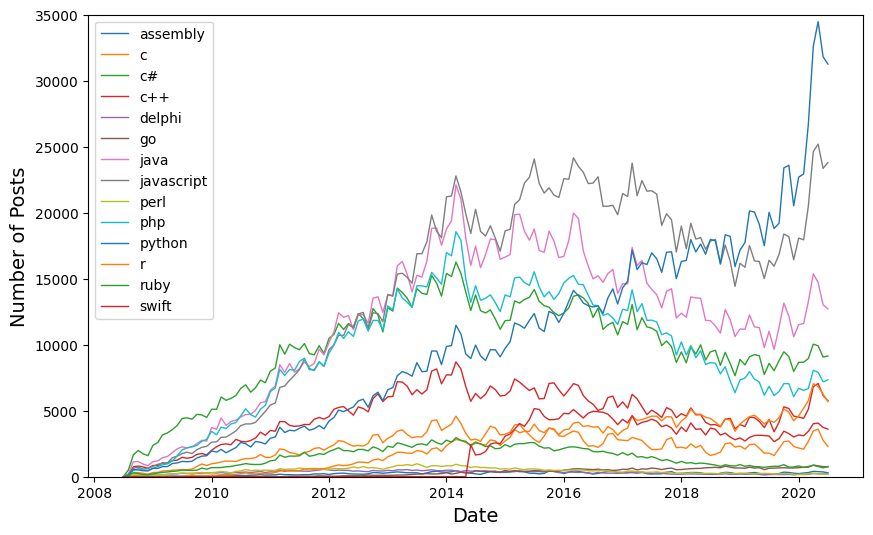

In [615]:
plt.figure(figsize=(10,6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], 
             linewidth=1, label=pivoted_df[column].name)
plt.legend(fontsize=10)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

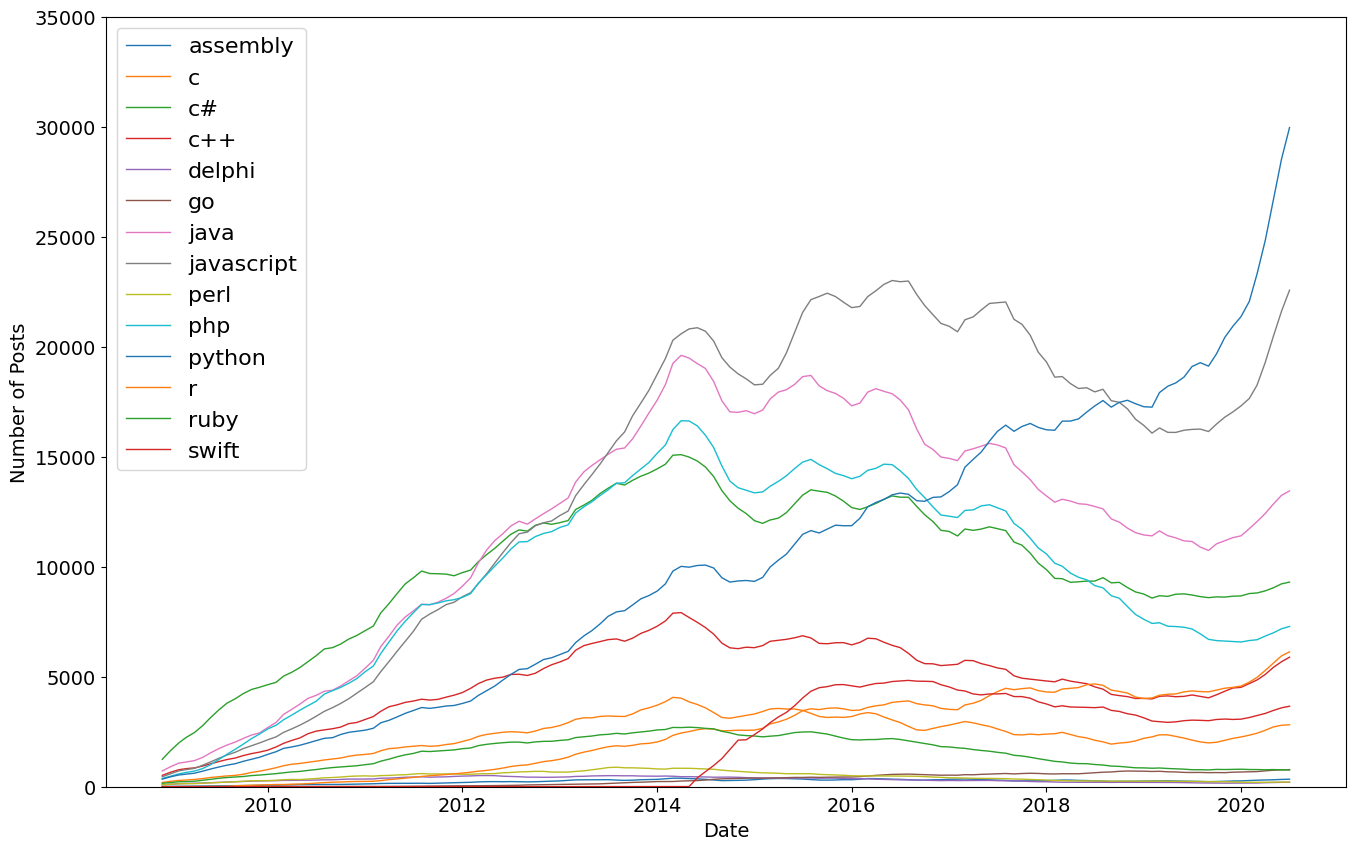

In [616]:
roll_df = pivoted_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=1, label=roll_df[column].name)
 
plt.legend(fontsize=16)